In [1]:
import pandas as pd
import numpy as np
import atoti as tt

Welcome to atoti 0.7.1!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


## Melakukan loading dataset OULAD

In [2]:
df_assess = pd.read_csv('assessments.csv')
df_courses = pd.read_csv('courses.csv')
df_studAssess = pd.read_csv('studentAssessment.csv')
df_studInfo = pd.read_csv('studentInfo.csv')
df_studReg = pd.read_csv('studentRegistration.csv')
df_studVle =pd.read_csv('studentVle.csv',)
df_vle = pd.read_csv('vle.csv')

## Data Cleaning

### Mengubah tipe data kolom "id" dari integer menjadi string
Supaya id tidak dimasukkan ke dalam SUM ketika membuat data cube, maka kita ubah ke string

#### Tabel Assessments

In [3]:
df_assess['id_assessment'] = df_assess['id_assessment'].astype('string')
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    string 
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), object(3), string(1)
memory usage: 9.8+ KB


#### Tabel Student Assessments

In [4]:
col = ['id_student','id_assessment']
df_studAssess[col] = df_studAssess[col].astype('string')
df_studAssess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  string 
 1   id_student      173912 non-null  string 
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(2), string(2)
memory usage: 6.6 MB


#### Tabel Student Info

In [5]:
df_studInfo['id_student'] = df_studInfo['id_student'].astype('string')
df_studInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  string
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(2), object(9), string(1)
memory usage: 3.0+ MB


#### Tabel Student Registration

In [6]:
df_studReg['id_student'] = df_studReg['id_student'].astype('string')
df_studReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  string 
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), object(2), string(1)
memory usage: 1.2+ MB


#### Tabel Student VLE

In [7]:
col = ['id_student','id_site']
df_studVle[col] = df_studVle[col].astype('string')
df_studVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         string
 3   id_site            string
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(2), object(2), string(2)
memory usage: 487.8+ MB


#### Tabel VLE

In [8]:
df_vle['id_site'] = df_vle['id_site'].astype('string')
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   string 
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), object(3), string(1)
memory usage: 298.4+ KB


### Apakah ada kolom yang kosong pada tabel?
Mengecek dengan pandas.isnull()

#### Tabel Assessment

In [9]:
null_value1 = pd.DataFrame(df_assess.isnull().sum().sort_values(ascending=False)).reset_index()
null_value1.columns = ['Column','Null Values']
null_value1

,Column,Null Values
0,date,11
1,code_module,0
2,code_presentation,0
3,id_assessment,0
4,assessment_type,0
5,weight,0


In [10]:
df1 = pd.DataFrame(df_assess, columns=['assessment_type','date'])
nan_values1 = df1[df1['date'].isnull()]

print (nan_values1)

    assessment_type  date
5              Exam   NaN
11             Exam   NaN
23             Exam   NaN
35             Exam   NaN
47             Exam   NaN
53             Exam   NaN
62             Exam   NaN
63             Exam   NaN
72             Exam   NaN
73             Exam   NaN
108            Exam   NaN


Setelah dicocokkan dengan dataset, ternyata kolom yang null hanya yang bertipe Exam. Menurut deskripsi dataset, indikator 'Pass' atau 'Fail' sebuah assignment hanya bergantung dari nilai, bukan tanggal submisi. Maka dari itu, kami melakukan drop kolom 'date'.

In [11]:
df_assess = df_assess.drop(columns='date')

In [12]:
df_assess.head()

,code_module,code_presentation,id_assessment,assessment_type,weight
0,AAA,2013J,1752,TMA,10.0
1,AAA,2013J,1753,TMA,20.0
2,AAA,2013J,1754,TMA,20.0
3,AAA,2013J,1755,TMA,20.0
4,AAA,2013J,1756,TMA,30.0


In [13]:
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    string 
 3   assessment_type    206 non-null    object 
 4   weight             206 non-null    float64
dtypes: float64(1), object(3), string(1)
memory usage: 8.2+ KB


#### Tabel Courses

In [14]:
null_value2 = pd.DataFrame(df_courses.isnull().sum().sort_values(ascending=False)).reset_index()
null_value2.columns = ['Column','Null Values']
null_value2

,Column,Null Values
0,code_module,0
1,code_presentation,0
2,module_presentation_length,0


#### Tabel Student Assessments

In [15]:
null_value3 = pd.DataFrame(df_studAssess.isnull().sum().sort_values(ascending=False)).reset_index()
null_value3.columns = ['Column','Null Values']
null_value3

,Column,Null Values
0,score,173
1,id_assessment,0
2,id_student,0
3,date_submitted,0
4,is_banked,0


In [16]:
df3 = pd.DataFrame(df_studAssess, columns=['id_assessment','id_student','score'])
nan_values3 = df3[df3['score'].isnull()]

print (nan_values3)

       id_assessment id_student  score
215             1752     721259    NaN
937             1754     260355    NaN
2364            1760    2606802    NaN
3358           14984     186780    NaN
3914           14984     531205    NaN
...              ...        ...    ...
148929         34903     582670    NaN
159251         37415     610738    NaN
166390         37427     631786    NaN
169725         37435     648110    NaN
170103         37435     480914    NaN

[173 rows x 3 columns]


#### Tabel Student Info

In [17]:
null_value4 = pd.DataFrame(df_studInfo.isnull().sum().sort_values(ascending=False)).reset_index()
null_value4.columns = ['Column','Null Values']
null_value4

,Column,Null Values
0,imd_band,1111
1,code_module,0
2,code_presentation,0
3,id_student,0
4,gender,0
5,region,0
6,highest_education,0
7,age_band,0
8,num_of_prev_attempts,0
9,studied_credits,0


In [18]:
df4 = pd.DataFrame(df_studInfo, columns=['id_student','region','imd_band'])
nan_values4 = df4[df4['imd_band'].isnull()]

print (nan_values4)

      id_student                region imd_band
9          53025          North Region      NaN
17         71361               Ireland      NaN
28        104476               Ireland      NaN
34        114017          North Region      NaN
65        172112               Ireland      NaN
...          ...                   ...      ...
30552     589914          North Region      NaN
31170     575199  North Western Region      NaN
31389     617889     South West Region      NaN
31777     634470          South Region      NaN
32397     683974          North Region      NaN

[1111 rows x 3 columns]


Pencarian IMD (Index of Multiple Deprivation) tidak mungkin dilakukan tanpa mengetahui area tempat tinggal student yang lebih spesifik. Maka, kolom yang null (dibiarkan/di-drop)

#### Tabel Student Registration

In [19]:
null_value5 = pd.DataFrame(df_studReg.isnull().sum().sort_values(ascending=False)).reset_index()
null_value5.columns = ['Column','Null Values']
null_value5

,Column,Null Values
0,date_unregistration,22521
1,date_registration,45
2,code_module,0
3,code_presentation,0
4,id_student,0


In [20]:
df5 = pd.DataFrame(df_studReg, columns=['id_student','code_module','date_unregistration'])
nan_values5 = df5[df5['date_unregistration'].isnull()]

print (nan_values5)

      id_student code_module  date_unregistration
0          11391         AAA                  NaN
1          28400         AAA                  NaN
3          31604         AAA                  NaN
4          32885         AAA                  NaN
5          38053         AAA                  NaN
...          ...         ...                  ...
32587    2620947         GGG                  NaN
32588    2640965         GGG                  NaN
32589    2645731         GGG                  NaN
32590    2648187         GGG                  NaN
32592    2684003         GGG                  NaN

[22521 rows x 3 columns]


Menurut deskripsi dataset, 'date_unregistration' yang kosong berarti student telah menyelesaikan modul. Kolom tersebut bisa dibiarkan saja.

#### Tabel Student VLE

In [21]:
null_value6 = pd.DataFrame(df_studVle.isnull().sum().sort_values(ascending=False)).reset_index()
null_value6.columns = ['Column','Null Values']
null_value6

,Column,Null Values
0,code_module,0
1,code_presentation,0
2,id_student,0
3,id_site,0
4,date,0
5,sum_click,0


#### Tabel VLE

In [22]:
null_value7 = pd.DataFrame(df_vle.isnull().sum().sort_values(ascending=False)).reset_index()
null_value7.columns = ['Column','Null Values']
null_value7

,Column,Null Values
0,week_from,5243
1,week_to,5243
2,id_site,0
3,code_module,0
4,code_presentation,0
5,activity_type,0


In [23]:
df_vle.shape

(6364, 6)

In [24]:
df_vle = df_vle.drop(columns=['week_from','week_to'])
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_site            6364 non-null   string
 1   code_module        6364 non-null   object
 2   code_presentation  6364 non-null   object
 3   activity_type      6364 non-null   object
dtypes: object(3), string(1)
memory usage: 199.0+ KB


Kolom 'week_from' dan 'week_to' di-drop karena tidak memberikan insight yang dapat digunakan.

In [25]:
session = tt.Session()

In [26]:
assess = session.read_pandas(df_assess, table_name="Assessments")
assess.head()

,code_module,code_presentation,id_assessment,assessment_type,weight
0,AAA,2013J,1752,TMA,10.0
1,AAA,2013J,1754,TMA,20.0
2,AAA,2014J,1758,TMA,10.0
3,BBB,2013B,14985,TMA,18.0
4,BBB,2013B,14987,TMA,18.0


In [27]:
courses = session.read_pandas(df_courses, table_name="Courses")
courses.head(10)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,EEE,2013J,268
2,FFF,2014B,241
3,AAA,2014J,269
4,BBB,2013J,268
5,GGG,2014B,241
6,BBB,2014J,262
7,DDD,2013B,240
8,BBB,2013B,240
9,FFF,2014J,269


In [28]:
studAssess = session.read_pandas(df_studAssess, keys=['id_student'], table_name="Student Assessments")
studAssess.head()

,id_assessment,date_submitted,is_banked,score
id_student,,,,
181316,1752,20,0,76.0
2429854,1752,24,0,51.0
2344901,1755,166,0,59.0
705379,1756,213,0,80.0
1105478,1756,216,0,76.0


In [29]:
studInfo = session.read_pandas(df_studInfo, keys=['id_student'], table_name="Student Info")
studInfo.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
id_student,,,,,,,,,,,
57506,AAA,2013J,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Pass
114017,AAA,2013J,F,North Region,Post Graduate Qualification,N/A,35-55,0,60,N,Pass
137873,AAA,2013J,M,South West Region,A Level or Equivalent,40-50%,35-55,0,60,N,Pass
155854,AAA,2013J,F,East Midlands Region,A Level or Equivalent,20-30%,35-55,0,60,N,Pass
175991,AAA,2013J,F,North Western Region,A Level or Equivalent,80-90%,0-35,0,180,N,Fail


In [30]:
studReg = session.read_pandas(df_studReg, table_name="Student Registration")
studReg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,31604,-52.0,NaN
3,AAA,2013J,45462,-67.0,NaN
4,AAA,2013J,63400,-67.0,NaN


In [31]:
studVle = session.read_pandas(df_studVle, table_name="Student VLE")
studVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546652,-10,8
4,AAA,2013J,32885,546719,-10,5


In [32]:
vle = session.read_pandas(df_vle, table_name="VLE")
vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546678,AAA,2013J,oucontent
2,546920,AAA,2013J,resource
3,546692,AAA,2013J,oucontent
4,546914,AAA,2013J,resource


In [33]:
studInfo.join(studAssess, mapping={'id_student': 'id_student'})

cube = session.create_cube(studInfo, "Student Data")
h, l, m = cube.hierarchies, cube.levels, cube.measures
cube

Cube(_name='Student Data', _hierarchies=Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of ...>, _cube_name='Student Data'), _measures=Measures())

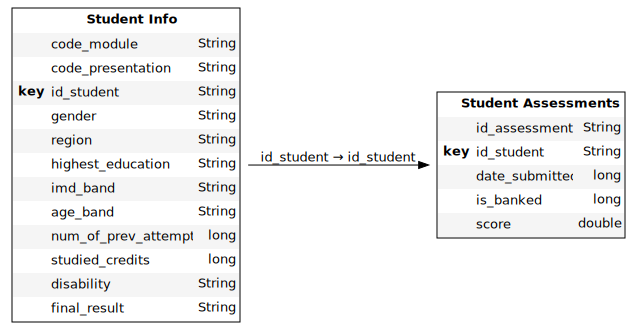

In [34]:
cube.schema

In [35]:
studInfo['studied_credits'].default_value = 0
studAssess['date_submitted'].default_value = 0

In [36]:
studAssess['is_banked'].default_value = 0

In [37]:
studAssess['score'].default_value = float(0)

In [38]:
h["student results"] = [
    studInfo['id_student'],
    studInfo['studied_credits'],
    studInfo['final_result']
]

h["student details"] = [
    studInfo['id_student'],
    studInfo['gender'],
    studInfo['region'],
    studInfo['highest_education'],
    studInfo['age_band']
]

h["assessments"] = [
    #studInfo['id_student'],
    #studAssess['id_assessment'],
    #studAssess['date_submitted'],
    studAssess['is_banked'],
    studAssess['score']
]

In [39]:
cube2 = session.create_cube(studInfo, "Student Data v2", mode="manual")
h = cube2.hierarchies

h["student results"] = [
    studInfo['id_student'],
    studInfo['studied_credits'],
    studInfo['final_result']
]

h["student details"] = [
    studInfo['id_student'],
    studInfo['gender'],
    studInfo['region'],
    studInfo['highest_education'],
    studInfo['age_band']
]

h["assessments"] = [
    studAssess['id_assessment'],
    studAssess['date_submitted'],
    studAssess['is_banked']
]

cube2

Cube(_name='Student Data v2', _hierarchies=Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of ...>, _cube_name='Student Data v2'), _measures=Measures())

In [40]:
session.visualize("Final results of students")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [41]:
session.visualize("Final results of students graph")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [42]:
session.visualize("Final results of students graph")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [43]:
session.visualize("Final results of students, sliced on Fail")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [44]:
session.visualize("Final results of students, diced")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [45]:
studVle['sum_click'].default_value = 0

In [46]:
studVle.join(studInfo, mapping={'id_student': 'id_student'})

cube4 = session.create_cube(studVle, "Click Data v2")
h, l, m = cube4.hierarchies, cube4.levels, cube4.measures

h["clicks"] = [
    studVle['code_module'],
    studVle['id_site'],
    studVle['sum_click']
]

h["student info"] = [
    studVle['id_student'],
    studInfo['gender'],
    studInfo['region'],
    studInfo['highest_education'],
    studInfo['age_band'],
    studInfo['imd_band']
]

In [47]:
cube4

Cube(_name='Click Data v2', _hierarchies=Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of ...>, _cube_name='Click Data v2'), _measures=Measures())

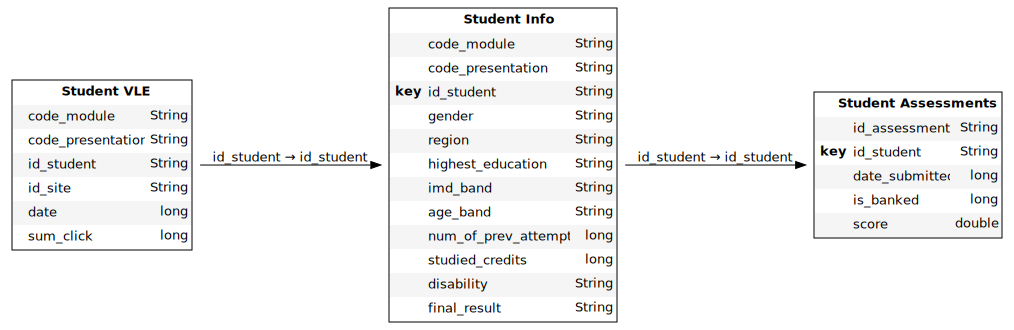

In [48]:
cube4.schema

In [49]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [50]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [51]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [52]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [53]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

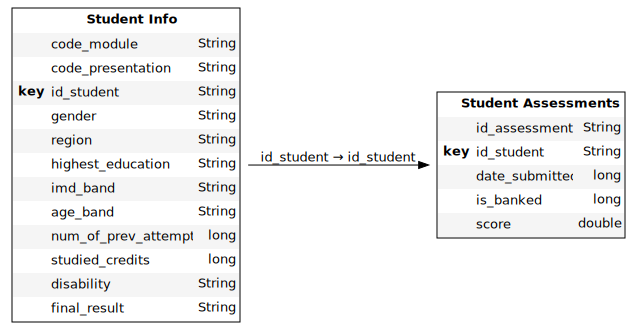

In [54]:
cube.schema

In [55]:
studAssess.join(assess, mapping={'id_assessment': 'id_assessment'})
studInfo.join(studAssess, mapping={'id_student': 'id_student'})

In [56]:
cube5 = session.create_cube(studInfo, "Complete Student Scores")
h, l, m = cube5.hierarchies, cube5.levels, cube5.measures
h["assessment scores"] = [
    assess['code_module'],
    studAssess['id_assessment'],
    studAssess['score']
]
cube5

Cube(_name='Complete Student Scores', _hierarchies=Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of ...>, _cube_name='Complete Student Scores'), _measures=Measures())

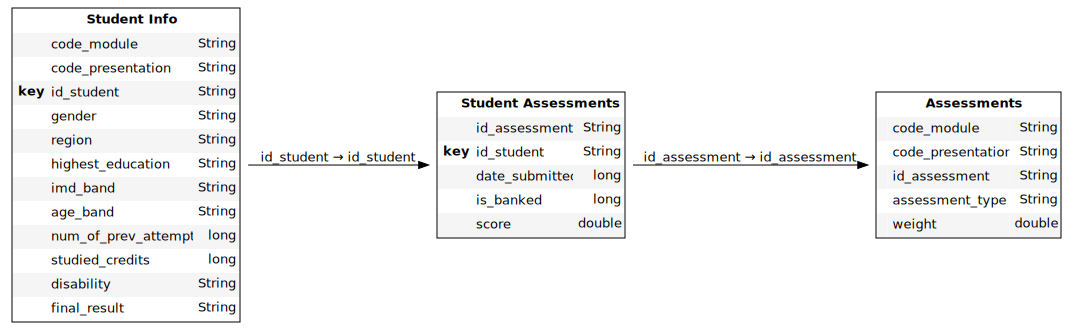

In [57]:
cube5.schema

In [58]:
studInfo2 = session.read_pandas(df_studInfo, keys=['id_student'], table_name="Student Info v2")
studInfo2.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
id_student,,,,,,,,,,,
57506,AAA,2013J,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Pass
114017,AAA,2013J,F,North Region,Post Graduate Qualification,N/A,35-55,0,60,N,Pass
137873,AAA,2013J,M,South West Region,A Level or Equivalent,40-50%,35-55,0,60,N,Pass
155854,AAA,2013J,F,East Midlands Region,A Level or Equivalent,20-30%,35-55,0,60,N,Pass
175991,AAA,2013J,F,North Western Region,A Level or Equivalent,80-90%,0-35,0,180,N,Fail


In [59]:
studAssess.join(studInfo2, mapping={'id_student': 'id_student'})

In [60]:
cube6 = session.create_cube(studAssess, "Student Scores")
h, l, m = cube6.hierarchies, cube6.levels, cube6.measures

In [61]:
cube6

Cube(_name='Student Scores', _hierarchies=Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of ...>, _cube_name='Student Scores'), _measures=Measures())

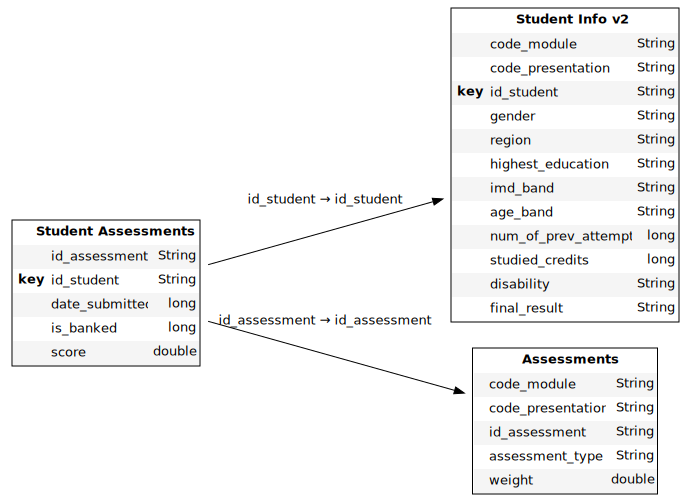

In [62]:
cube6.schema

In [63]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [64]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [65]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [66]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.